# REGRESION LINEAL MULTIVARIABLE


En este documento se implementará el algoritmo de gradiente descendiente para calcular los precios de una casa dependiendo de su tamaño en pies y número de habitaciones.

In [1]:
import sympy as sym #libreria de matematica simbolica 
import matplotlib.pyplot as plt
import csv

%matplotlib inline

#creo mi variable X la cual va ser una lista de listas donde
# la lista X[i] representa las variables en un ejemplo de entrenamiento
X= []
Y = []
n = 2 #en este ejemplo solo trabajamos con dos variables
with open('./data/dataHouses.csv') as csvarchivo:
    #['Size', 'Bedrooms', 'Price']
    entrada = csv.reader(csvarchivo)
    for reg in entrada:
        l = []
        l.append(1)# x[0] será 1 para poder ajustar las operaciones 
        l.append(int(reg[0]))
        l.append(int(reg[1]))
        X.append(l)
        Y.append(int(reg[2]))
        
m = len(Y)#cantidad de ejemplos para el entrenamiento

Ahora procederemos a crear nuestra hipotesis y una funcion para evaluar esta con un x[i] dado

In [2]:
#necesitamos crear las variables 
x1,x2 = sym.symbols('x1 x2', real = True)
#Note que no se crea X0 por que esta es igual a 1

Tethas = [1,1,1] #inicio en cualquier valor.
#este arreglo se va ir modificando a medida que corra el algoritmo

def MakeHipotesis(Tet, Var1, Var2):
    '''Se encarga de crear la fucion de costo con '''
    H = Tet[0] + Tet[1]*Var1 + Tet[2]*Var2
    return H

Hipotesis = MakeHipotesis(Tethas, x1, x2)
sym.pprint(Hipotesis) #mostramos la ecuacion


def CalcHipotesis(H,Xi):
    return Hipotesis.subs({x1:Xi[1], x2:Xi[2]})#si quiero evaluarla 0
    
print(CalcHipotesis(Hipotesis, [1,2,2]))

x₁ + x₂ + 1
5


Ahora se va definir una funcion que calcule el error cuadratico medio con el conjunto de prueba

In [3]:

def CostFunction(H,X,Y):
    '''funcion que calcula el error cuadratico medio'''
    res = 0
    for i in range(0,m):
        res += (1/(2*m)) * ((CalcHipotesis(H,X[i])- Y[i]))**2
    return res
        

print(CostFunction(Hipotesis,X,Y))

64828197300.7979


Ahora vamos a crear el algoritmo del gradiente descendiente para una sola iteracion y vamos  a validar que la funcion de costo disminuya su valor

In [4]:
def GradienteDes(H, Thetas, X, Y, alpha):
    
    for theta in range(len(Thetas)):
        
        #desplazo Thetha[i]
        calcderivada = 0 #resultado del calculo
        for i in range(m):
            
            #calculo la cantidad que voy a restarle al valor actual de theha
            calcderivada += (1/m) * (CalcHipotesis(H,X[i]) - Y[i] ) * X[i][theta]
            
        #calculo el nuevo thetha
        Thetas[theta] = Thetas[theta] - (alpha * calcderivada)
        
            


Ahora se procede a ejecutar el algoritmo del gradiente varias veces, para acercar los valores de Theta a un minimo

In [5]:
Costos = []
#ejecutamos el gradiente varias veces para calcular los valores de Thetha mas adecuados
for i in range(0,500):
    GradienteDes(Hipotesis,Tethas,X,Y,0.01) 
    Hipotesis = MakeHipotesis(Tethas, x1, x2)
    Costos.append(CostFunction(Hipotesis,X,Y))

Observamos el valor que ha tomado la hipotesis

In [6]:
#mostamos como esta la hipotesis en este instate
sym.pprint(Hipotesis) #mostramos la ecuacion
print('costo',CostFunction(Hipotesis,X,Y))

-3.73282315244959e+2334⋅x₁ - 5.39143431790615e+2331⋅x₂ - 1.61619793695809e+233
1
costo 3.21934553523341e+4675


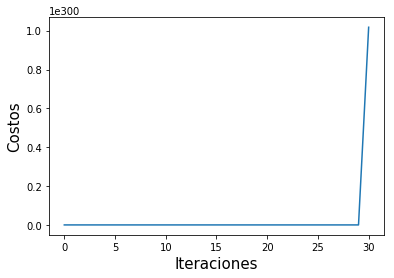

In [8]:


iterCostos = range(len(Costos))
plt.figure()
#plt.title('h_theta(x), theta_0=50000 and theta_1=60', fontsize=15)
plt.xlabel('Iteraciones', fontsize=15)
plt.ylabel('Costos', fontsize=15)
#plt.scatter(X,Y,color='red',marker='x')
plt.plot(iterCostos,Costos)

Ahora procedemos a quitar el sesgo que existe con la forma mas basica, el NuevoX1 = X1/2000, NuevoX2 = X2/5, siendo 5 la casa con mas habitaciones, y 2000 podría ser el tamaño mas grande, en este caso no lo es pero igual lo tomaremos

In [14]:
nuevoX = []#un arreglo para guardar las variables transformadas
nuevoThethas = [1,1,1]
for i in X:
    
    nuevoX.append([i[0], i[1]/2000, i[2]/5]) #hacemos la escala

#generamos la nuevo hipotesis
NHipotesis = MakeHipotesis(nuevoThethas, x1, x2)
sym.pprint(NHipotesis)

x₁ + x₂ + 1


Ahora ejecutaremos el algoritmo del gradiente para este nuevo conjunto de entrenamiento mejorado

In [15]:
Costos = []
#ejecutamos el gradiente varias veces para calcular los valores de Thetha mas adecuados
for i in range(0,500):
    GradienteDes(NHipotesis,nuevoThethas,nuevoX,Y,0.01) 
    NHipotesis = MakeHipotesis(nuevoThethas, x1, x2)
    Costos.append(CostFunction(NHipotesis,nuevoX,Y))

Ahora visualizaremos el valor de la funcion de costo con las iteraciones.

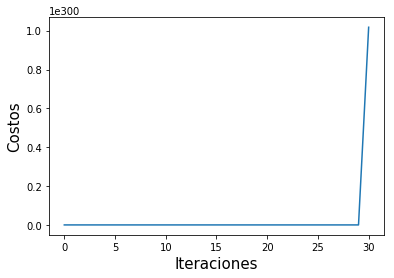

In [10]:

iterCostos = range(len(Costos))
plt.figure()
#plt.title('h_theta(x), theta_0=50000 and theta_1=60', fontsize=15)
plt.xlabel('Iteraciones', fontsize=15)
plt.ylabel('Costos', fontsize=15)
#plt.scatter(X,Y,color='red',marker='x')
plt.plot(iterCostos,Costos)

In [17]:
print(Costos[len(Costos) - 1])

8.06780692791638e+4668
